In [1]:
## win red / blue
## avg gold winning vs losing team
## avg KD winning vs losing team
##correlation matrix


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
# Load dataset
file_path = "high_diamond_ranked_10min.csv"
df = pd.read_csv(file_path)

# Display the first 10 rows of the dataset
display(df.head(10))

# Check for missing values
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values in the dataset. ✅")
else:
    print("Missing Values in Each Column:")
    print(missing_columns)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


No missing values in the dataset. ✅


/var/folders/jf/y1zk42cj5vz9tlc23_zfpsyr0000gn/T/ipykernel_27088/261609452.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette=["red", "blue"])


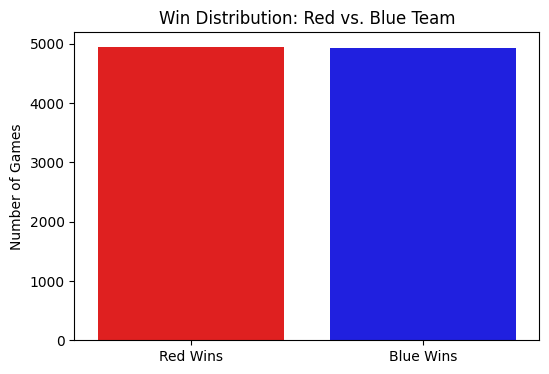

<Figure size 600x400 with 0 Axes>

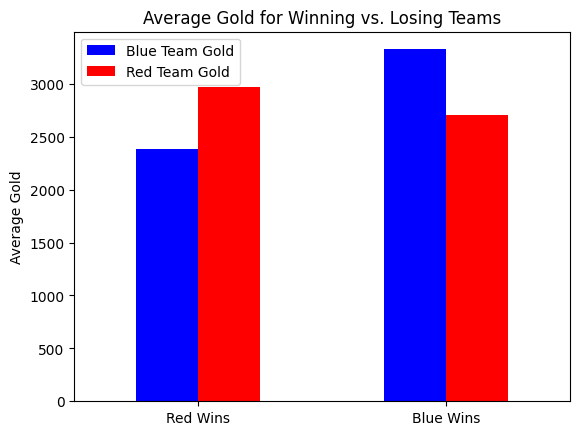

<Figure size 600x400 with 0 Axes>

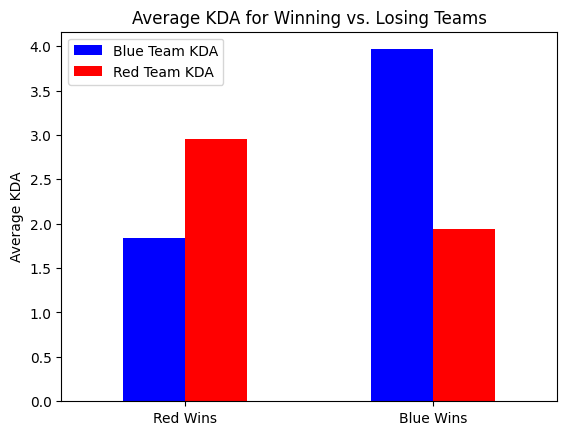

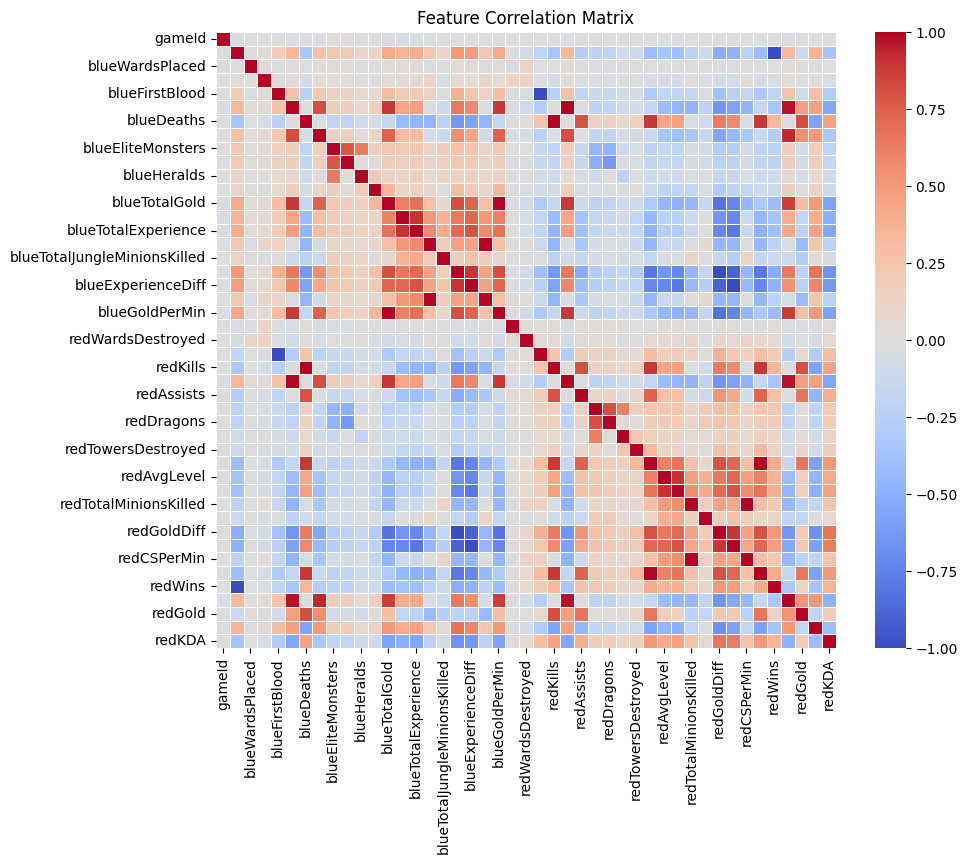

In [5]:

# Load dataset using a relative path
file_path = "high_diamond_ranked_10min.csv"
df = pd.read_csv(file_path)

# Create "figures" folder if it doesn't exist
figures_path = "figures"
os.makedirs(figures_path, exist_ok=True)

# Add a redWins column for easier analysis
df["redWins"] = 1 - df["blueWins"]

# Win rate comparison (Red vs. Blue)
win_counts = df["blueWins"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=win_counts.index, y=win_counts.values, palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Red Wins", "Blue Wins"])
plt.xlabel("")  # Remove x-axis label
plt.ylabel("Number of Games")
plt.title("Win Distribution: Red vs. Blue Team")
plt.savefig(os.path.join(figures_path, "win_distribution.png"))  # Save figure
plt.show()

# Average gold for winning vs. losing teams
df["blueGold"] = df["blueKills"] * 300 + df["blueAssists"] * 150  # Approximate gold
df["redGold"] = df["blueDeaths"] * 300 + df["blueAssists"] * 150  # Approximate gold

gold_means = df.groupby("blueWins")[["blueGold", "redGold"]].mean()
plt.figure(figsize=(6, 4))
gold_means.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Red Wins", "Blue Wins"], rotation=0)
plt.xlabel("")  # Remove x-axis label
plt.ylabel("Average Gold")
plt.title("Average Gold for Winning vs. Losing Teams")
plt.legend(["Blue Team Gold", "Red Team Gold"])
plt.savefig(os.path.join(figures_path, "average_gold.png"))  # Save figure
plt.show()

# Average KDA for winning vs. losing teams
df["blueKDA"] = (df["blueKills"] + df["blueAssists"]) / df["blueDeaths"].replace(0, 1)
df["redKDA"] = (df["blueDeaths"] + df["blueAssists"]) / df["blueKills"].replace(0, 1)

kda_means = df.groupby("blueWins")[["blueKDA", "redKDA"]].mean()
plt.figure(figsize=(6, 4))
kda_means.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Red Wins", "Blue Wins"], rotation=0)
plt.xlabel("")  # Remove x-axis label
plt.ylabel("Average KDA")
plt.title("Average KDA for Winning vs. Losing Teams")
plt.legend(["Blue Team KDA", "Red Team KDA"])
plt.savefig(os.path.join(figures_path, "average_kda.png"))  # Save figure
plt.show()

# Correlation matrix without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.savefig(os.path.join(figures_path, "correlation_matrix.png"))  # Save figure
plt.show()


Number of components to explain 90% variance: 14


/var/folders/jf/y1zk42cj5vz9tlc23_zfpsyr0000gn/T/ipykernel_27088/2068913777.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contributions.values, y=contributions.index, palette="viridis")


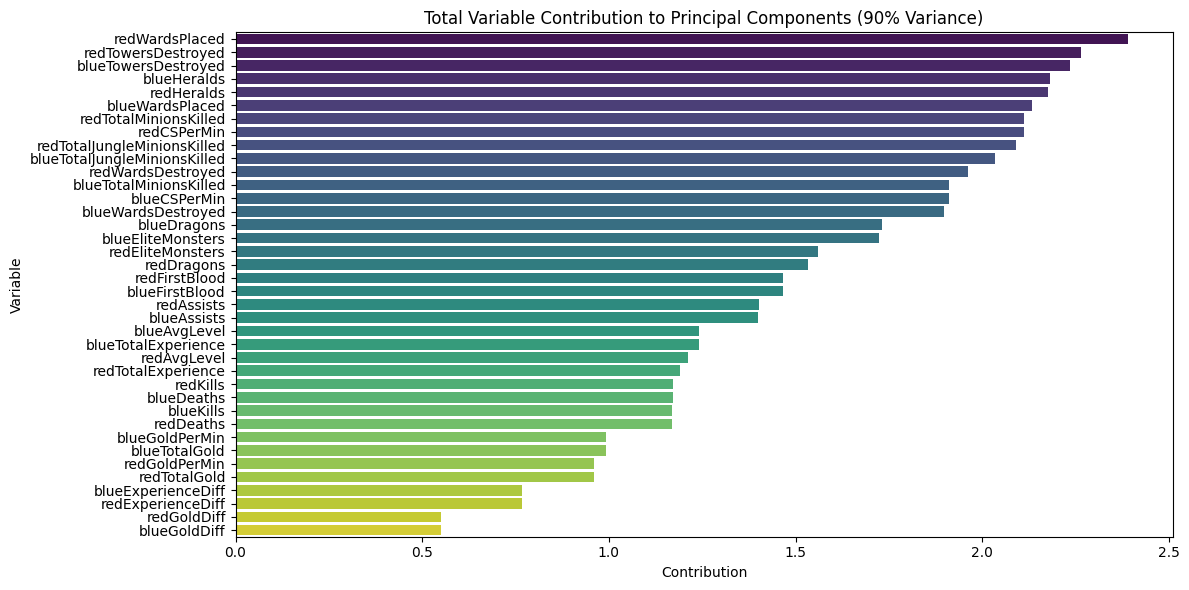

In [6]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("high_diamond_ranked_10min (1).csv")

# Drop identifier and target column
features_df = df.drop(columns=["gameId", "blueWins"])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_df)

# Run PCA to retain 90% of the variance
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_data)
num_components = pca.n_components_
print(f"Number of components to explain 90% variance: {num_components}")

# Calculate absolute contributions (loadings) for each original feature
loadings = pd.DataFrame(
    np.abs(pca.components_),
    columns=features_df.columns
)

# Sum of contributions of each variable across selected components
contributions = loadings.sum(axis=0).sort_values(ascending=False)

# Plot the contributions
plt.figure(figsize=(12, 6))
sns.barplot(x=contributions.values, y=contributions.index, palette="viridis")
plt.title("Total Variable Contribution to Principal Components (90% Variance)")
plt.xlabel("Contribution")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


C:\Users\neilc\AppData\Local\Temp\ipykernel_39612\1086481985.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette=["red", "blue"])


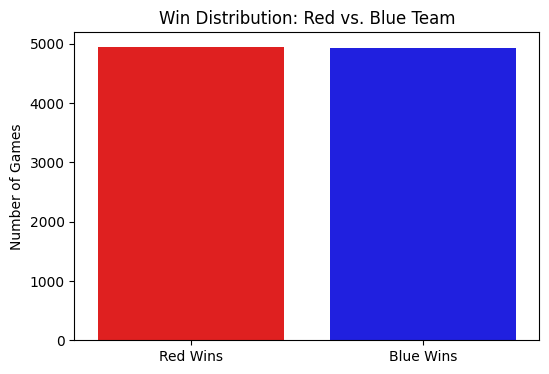

<Figure size 600x400 with 0 Axes>

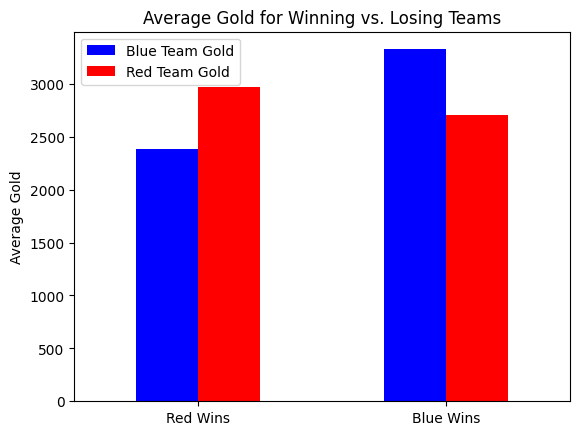

<Figure size 600x400 with 0 Axes>

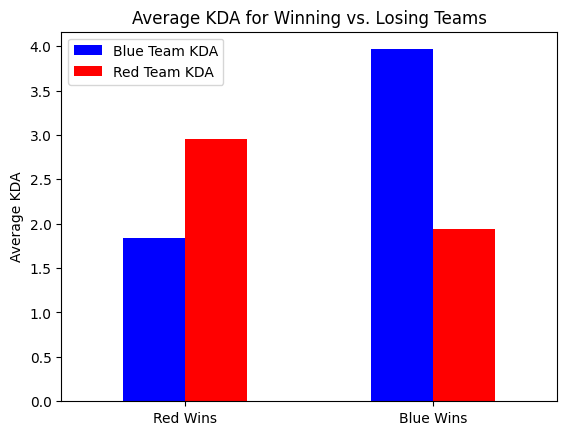

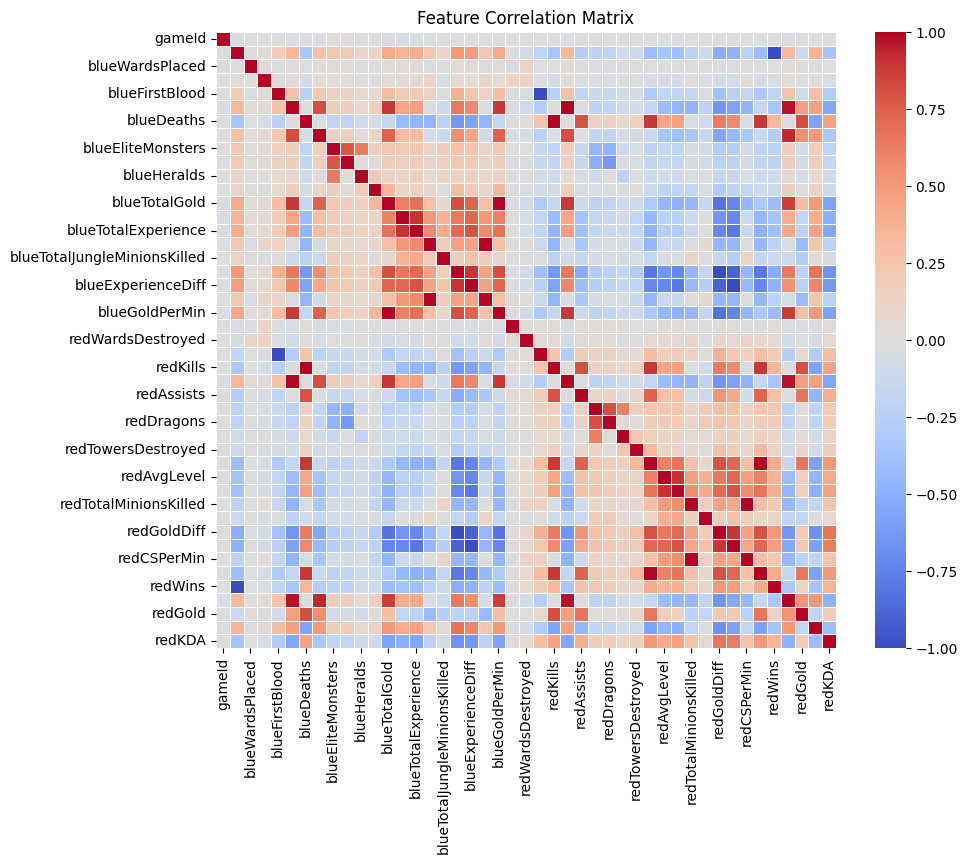

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset using a relative path
file_path = "high_diamond_ranked_10min.csv"
df = pd.read_csv(file_path)

# Create "figures" folder if it doesn't exist
figures_path = "figures"
os.makedirs(figures_path, exist_ok=True)

# Add a redWins column for easier analysis
df["redWins"] = 1 - df["blueWins"]

# Win rate comparison (Red vs. Blue)
win_counts = df["blueWins"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=win_counts.index, y=win_counts.values, palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Red Wins", "Blue Wins"])
plt.xlabel("")  # Remove x-axis label
plt.ylabel("Number of Games")
plt.title("Win Distribution: Red vs. Blue Team")
plt.savefig(os.path.join(figures_path, "win_distribution.png"))  # Save figure
plt.show()

# Average gold for winning vs. losing teams
df["blueGold"] = df["blueKills"] * 300 + df["blueAssists"] * 150  # Approximate gold
df["redGold"] = df["blueDeaths"] * 300 + df["blueAssists"] * 150  # Approximate gold

gold_means = df.groupby("blueWins")[["blueGold", "redGold"]].mean()
plt.figure(figsize=(6, 4))
gold_means.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Red Wins", "Blue Wins"], rotation=0)
plt.xlabel("")  # Remove x-axis label
plt.ylabel("Average Gold")
plt.title("Average Gold for Winning vs. Losing Teams")
plt.legend(["Blue Team Gold", "Red Team Gold"])
plt.savefig(os.path.join(figures_path, "average_gold.png"))  # Save figure
plt.show()

# Average KDA for winning vs. losing teams
df["blueKDA"] = (df["blueKills"] + df["blueAssists"]) / df["blueDeaths"].replace(0, 1)
df["redKDA"] = (df["blueDeaths"] + df["blueAssists"]) / df["blueKills"].replace(0, 1)

kda_means = df.groupby("blueWins")[["blueKDA", "redKDA"]].mean()
plt.figure(figsize=(6, 4))
kda_means.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Red Wins", "Blue Wins"], rotation=0)
plt.xlabel("")  # Remove x-axis label
plt.ylabel("Average KDA")
plt.title("Average KDA for Winning vs. Losing Teams")
plt.legend(["Blue Team KDA", "Red Team KDA"])
plt.savefig(os.path.join(figures_path, "average_kda.png"))  # Save figure
plt.show()

# Correlation matrix
correlation_matrix = df.corr()

# Save the correlation matrix as a JSON file
correlation_matrix_json_path = os.path.join(figures_path, "correlation_matrix.json")
correlation_matrix.to_json(correlation_matrix_json_path)

# Correlation matrix heatmap without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.savefig(os.path.join(figures_path, "correlation_matrix.png"))  # Save figure
plt.show()

In [2]:
import pandas as pd

# Load the original dataset
df = pd.read_csv("high_diamond_ranked_10min.csv")

# Prepare lists to collect winning and losing team data
winning_teams = []
losing_teams = []

for _, row in df.iterrows():
    if row['blueWins'] == 1:
        # Blue team won
        winning_row = row[[col for col in row.index if col.startswith('blue')]].copy()
        losing_row = row[[col for col in row.index if col.startswith('red')]].copy()
        winning_row.index = [col.replace('blue', '') for col in winning_row.index]
        losing_row.index = [col.replace('red', '') for col in losing_row.index]
        winning_row['team'] = 'blue'
        winning_row['won'] = 1
        losing_row['team'] = 'red'
        losing_row['won'] = 0
    else:
        # Red team won
        winning_row = row[[col for col in row.index if col.startswith('red')]].copy()
        losing_row = row[[col for col in row.index if col.startswith('blue')]].copy()
        winning_row.index = [col.replace('red', '') for col in winning_row.index]
        losing_row.index = [col.replace('blue', '') for col in losing_row.index]
        winning_row['team'] = 'red'
        winning_row['won'] = 1
        losing_row['team'] = 'blue'
        losing_row['won'] = 0

    winning_teams.append(winning_row)
    losing_teams.append(losing_row)

# Convert to DataFrames
df_win = pd.DataFrame(winning_teams)
df_lose = pd.DataFrame(losing_teams)

# Combine into one full dataset
df_combined = pd.concat([df_win, df_lose], ignore_index=True)

# Optional: drop any leftover columns you don’t need
df_combined = df_combined.drop(columns=['Wins'], errors='ignore')

# Save to CSV if needed
df_combined.to_csv("team_data_with_win_label.csv", index=False)


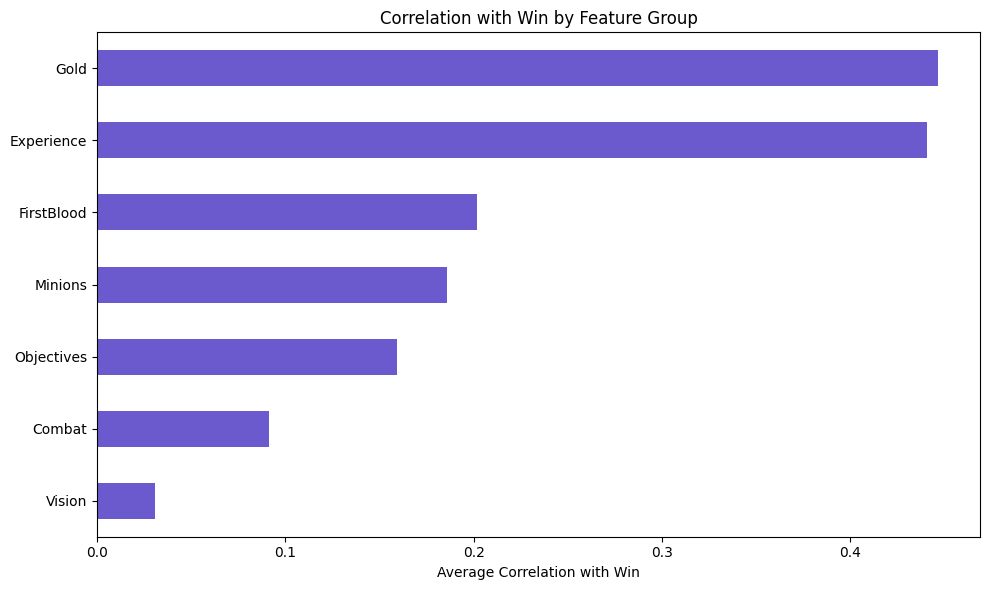

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the data
df = pd.read_csv("team_data_with_win_label.csv")

# Clean the win column
df['won'] = df['won'].astype(str).str.contains("1").astype(int)

# Define feature groups
group_map = {
    'Gold': ['TotalGold', 'GoldPerMin', 'GoldDiff'],
    'Experience': ['TotalExperience', 'ExperienceDiff'],
    'Vision': ['WardsPlaced', 'WardsDestroyed'],
    'Minions': ['TotalMinionsKilled', 'TotalJungleMinionsKilled', 'CSPerMin'],
    'Objectives': ['Dragons', 'Heralds', 'TowersDestroyed', 'EliteMonsters'],
    'Combat': ['Kills', 'Assists', 'Deaths'],
    'FirstBlood': ['FirstBlood'],
}

# Compute mean correlation of each group with 'won'
combined_corr = {}
for group, cols in group_map.items():
    valid_cols = [col for col in cols if col in df.columns]
    if valid_cols:
        corr = df[valid_cols + ['won']].corr(numeric_only=True)['won'].drop('won').mean()
        combined_corr[group] = corr

# Sort correlations
sorted_corr = pd.Series(combined_corr).sort_values()

# Plot bar chart
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='barh', color='slateblue')
plt.title("Correlation with Win by Feature Group")
plt.xlabel("Average Correlation with Win")
plt.tight_layout()
plt.show()

# Save to JSON
with open("grouped_feature_correlation_with_win.json", "w") as f:
    json.dump(sorted_corr.to_dict(), f, indent=4)


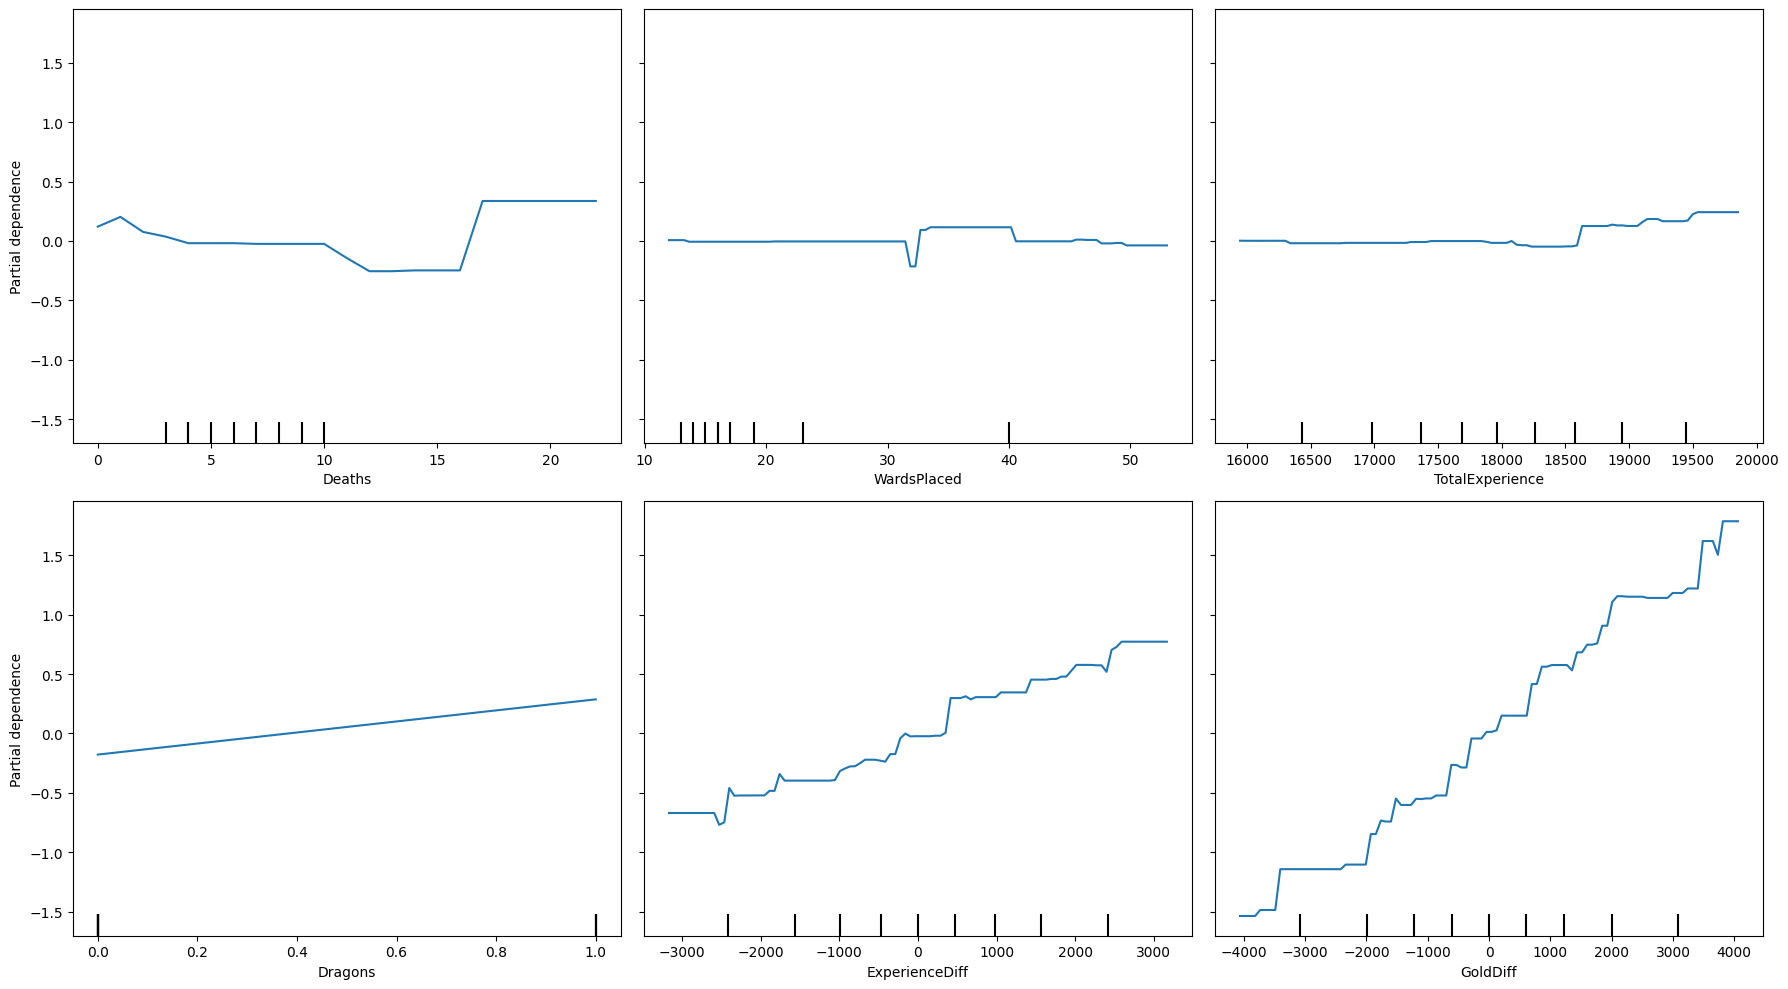

In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
df = pd.read_csv("team_data_with_win_label.csv")
df['won'] = df['won'].astype(str).str.contains("1").astype(int)
X = df.drop(columns=['team', 'won'])
y = df['won']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Get top 6 features by importance
importances = model.feature_importances_
top_indices = np.argsort(importances)[-6:]
top_features = [X.columns[i] for i in top_indices]

# Plot PDPs
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
PartialDependenceDisplay.from_estimator(model, X, top_features, ax=ax)
plt.tight_layout()
plt.show()
